# Preparación de Datos

Carguemos las principales librerías a utilizar.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Carguemos el CSV a utilizar (airbnb-listings-extract).

In [2]:
df_airbnb = pd.read_csv("airbnb-listings-extract.csv", sep=";")

En primer lugar, para evitar el *Data Snopping*, dividamos el Dataset en Datos de entrenamiento y Datos de prueba. A partir de aquí trabajaremos primordialmente con los Datos de entrenamiento y solo tocaremos los Datos de prueba en el preprocesamiento, para las predicciones y para comprobar los resultados.

In [3]:
# Importación de la clase de Scikit-Learn necesaria para hacer la división
from sklearn.model_selection import train_test_split

# Colocamos una semilla (42) para que los resultados puedan replicarse
# Nos aseguramos que los datos se barajen antes de la división
# De manera predeterminada se destinará para entrenamiento el 75% de los datos y para prueba el 25%
df_train, df_test = train_test_split(df_airbnb, random_state=42, shuffle=True)

# Análisis Exploratorio de Datos

En primera instancia, veamos parte de los datos.

In [4]:
df_train.head().T

,9139,5723,2018,3316,4328
ID,8510004,17330064,9848841,17003150,11360894
Listing Url,https://www.airbnb.com/rooms/8510004,https://www.airbnb.com/rooms/17330064,https://www.airbnb.com/rooms/9848841,https://www.airbnb.com/rooms/17003150,https://www.airbnb.com/rooms/11360894
Scrape ID,20170508161515,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-05-09,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,Lovely apartment to Ponte Milvio,"Central Madrid,Stylish 2 bed aptmnt.",Pequeño apartamento Madrid capital,Habitacion comoda y tranquila en Barrio del Pilar,Piso en inmejorable ubicación
...,...,...,...,...,...
Cancellation Policy,flexible_new,moderate,flexible,flexible,strict
Calculated host listings count,12.0,1.0,1.0,1.0,1.0
Reviews per Month,0.11,1.46,0.06,NaN,0.28
Geolocation,"41.942731456,12.4730975688","40.4084343355,-3.66818534155","40.4457302216,-3.5828381516","40.4811030292,-3.71786923321","40.4233371439,-3.68630900293"


Veamos ahora la estructura de los datos.

In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,11085.0,1.025962e+07,5.549354e+06,1.862800e+04,5.560037e+06,1.123614e+07,1.529322e+07,1.858124e+07
Scrape ID,11085.0,2.017037e+13,5.610338e+08,2.016010e+13,2.017041e+13,2.017041e+13,2.017041e+13,2.017062e+13
Host ID,11085.0,3.604078e+07,3.417657e+07,1.745300e+04,6.733721e+06,2.461974e+07,5.432084e+07,1.247534e+08
Host Response Rate,9643.0,9.475464e+01,1.539399e+01,0.000000e+00,9.900000e+01,1.000000e+02,1.000000e+02,1.000000e+02
Host Listings Count,11083.0,1.258161e+01,3.426869e+01,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,5.190000e+02
Host Total Listings Count,11083.0,1.258161e+01,3.426869e+01,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,5.190000e+02
Latitude,11085.0,4.049412e+01,4.614200e+00,-3.785118e+01,4.040965e+01,4.041933e+01,4.043076e+01,5.595672e+01
Longitude,11085.0,-3.848038e+00,1.405131e+01,-1.231313e+02,-3.707511e+00,-3.700776e+00,-3.684244e+00,1.512903e+02
Accommodates,11085.0,3.265223e+00,2.089184e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
Bathrooms,11040.0,1.280933e+00,6.551334e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00


In [6]:
# Opciones preferidas
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# Informaciones relevantes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11085 entries, 9139 to 7270
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              11085 non-null  int64  
 1   Listing Url                     11085 non-null  object 
 2   Scrape ID                       11085 non-null  int64  
 3   Last Scraped                    11085 non-null  object 
 4   Name                            11084 non-null  object 
 5   Summary                         10631 non-null  object 
 6   Space                           8150 non-null   object 
 7   Description                     11080 non-null  object 
 8   Experiences Offered             11085 non-null  object 
 9   Neighborhood Overview           6829 non-null   object 
 10  Notes                           4185 non-null   object 
 11  Transit                         6762 non-null   object 
 12  Access                        

Por lo que se puede observar, algunos campos poseen una cantidad significativa de registros vacíos, esto podría ser un problema a la hora de entrenar los modelos. Determinemos que porcentaje de registros vacíos hay por cada campo.

In [7]:
# Porcentaje de registros vacíos por campo
conteo_registros_por_campo = df_train.count()
cant_registros = df_train.count().max()
porcentaje_vacios = (cant_registros - conteo_registros_por_campo[conteo_registros_por_campo < cant_registros]) / cant_registros * 100
porcentaje_vacios.sort_values(ascending=False)

Has Availability                  99.909788
Host Acceptance Rate              99.729364
Jurisdiction Names                98.520523
License                           97.681552
Square Feet                       96.021651
Monthly Price                     75.687866
Weekly Price                      75.471358
Notes                             62.246279
Security Deposit                  57.771764
Interaction                       44.429409
Access                            43.924222
Cleaning Fee                      41.235904
Transit                           38.998647
Neighborhood Overview             38.394226
Host About                        35.570591
Neighbourhood                     35.462336
House Rules                       35.002255
Space                             26.477221
Host Neighbourhood                26.278755
Review Scores Location            22.607127
Review Scores Value               22.598106
Review Scores Checkin             22.580063
Review Scores Accuracy          

Vemos que hay muchos campos con un porcentaje de registros vacíos muy elevado. Más adelante, en la parte de preprocesamiento, nos desharemos de todos los campos cuyo porcentaje de vacíos supere el 30%. Mientras tanto, veamos cuales son las variables que mejor correlan con *Price*.

In [8]:
# Método de Correlación: Pearson
df_train.corr(method="pearson")["Price"].sort_values(ascending=False)

Price                             1.000000
Weekly Price                      0.833967
Monthly Price                     0.826683
Cleaning Fee                      0.680903
Accommodates                      0.521753
Bedrooms                          0.508168
Square Feet                       0.484575
Beds                              0.446830
Security Deposit                  0.409157
Bathrooms                         0.395896
Guests Included                   0.303209
Host Total Listings Count         0.223990
Host Listings Count               0.223990
Calculated host listings count    0.217621
Extra People                      0.144069
Review Scores Location            0.105000
Availability 30                   0.100782
Review Scores Cleanliness         0.079122
Review Scores Rating              0.074818
Review Scores Accuracy            0.065164
Availability 60                   0.062336
Availability 365                  0.054811
Availability 90                   0.030163
Minimum Nig

Se puede notar que las 5 variables que mejor correlan con *Price* son *Monthly Price*, *Weekly Price*, *Cleaning Fee*, *Accommodates* y *Bedrooms*. Diría que este resultado no es sorpresivo... Sin embargo, es preocupante debido a la gran cantidad de registros vacíos para los campos *Monthly Price*, *Weekly Price* y *Cleaning Fee*. En vista de esta situación, veamos como se comporta el campo *Price* en función de los campos *Accommodates* y *Bedrooms*.

Estos gráficos permiten mostrar como se comporta el campo *Price* en función del campo *Accommodates* y como se comporta el campo *Price* en función del campo *Bedrooms*.

Text(0, 0.5, 'Price')

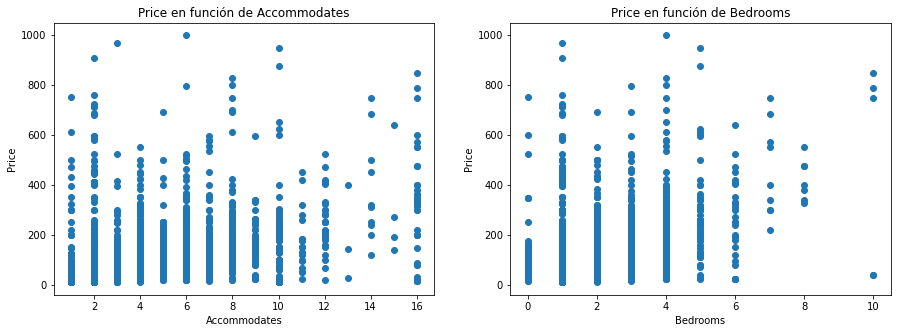

In [9]:
# Establecer el tamaño de los gráficos
plt.figure(figsize=(15,5))

# Scatter plot de Price en función de Accommodates
plt.subplot(121)
plt.scatter(x=df_train["Accommodates"], y=df_train["Price"])
plt.title("Price en función de Accommodates")
plt.xlabel("Accommodates")
plt.ylabel("Price")

# Scatter plot de Price en función de Bedrooms
plt.subplot(122)
plt.scatter(x=df_train["Bedrooms"], y=df_train["Price"])
plt.title("Price en función de Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")

# Prepocesamiento

Ya que sabemos como están organizados los datos, dedicaremos este acápite a preparar el Dataset para poder modelar.

***Preprocesamiento para los Datos de entrenamiento***.

In [10]:
#------------------------------------------------------------------------------------------------------------------------
# En primer lugar, eliminaremos aquellas variables que a simple vista se nota no nos servirán
#------------------------------------------------------------------------------------------------------------------------

df_train = df_train.drop(["ID",
                          "Listing Url",
                          "Scrape ID",
                          "Last Scraped",
                          "Thumbnail Url",
                          "Medium Url",
                          "Picture Url",
                          "XL Picture Url",
                          "Host ID",
                          "Host URL",
                          "Host Thumbnail Url",
                          "Host Picture Url",
                          "Geolocation",
                          "Name",
                          "Summary",
                          "Space",
                          "Description",
                          "Experiences Offered",
                          "Calendar last Scraped"], axis=1)

#------------------------------------------------------------------------------------------------------------------------
# En segundo lugar, eliminaremos aquellas variables cuyo porcentaje de registros vacíos supera el 30%
#------------------------------------------------------------------------------------------------------------------------

df_train = df_train.drop(["Has Availability",
                          "Host Acceptance Rate",
                          "Jurisdiction Names",
                          "License",
                          "Square Feet",
                          "Monthly Price",
                          "Weekly Price",
                          "Notes",
                          "Security Deposit",
                          "Interaction",
                          "Access",
                          "Cleaning Fee",
                          "Transit",
                          "Neighborhood Overview",
                          "Host About",
                          "Neighbourhood",
                          "House Rules"], axis=1)

#------------------------------------------------------------------------------------------------------------------------
# Ahora utilizaremos la clase LabelEncoder de Scikit-Learn para codificar las variables categóricas
#------------------------------------------------------------------------------------------------------------------------

# Importamos la clase de Scikit-Learn
from sklearn.preprocessing import LabelEncoder

# Creamos los objetos
le_HostName = LabelEncoder()
le_HostSince = LabelEncoder()
le_HostLocation = LabelEncoder()
le_HostResponseTime = LabelEncoder()
le_HostNeighbourhood = LabelEncoder()
le_HostVerifications = LabelEncoder()
le_Street = LabelEncoder()
le_NeighbourhoodCleansed = LabelEncoder()
le_NeighbourhoodGroupCleansed = LabelEncoder()
le_City = LabelEncoder()
le_State = LabelEncoder()
le_Zipcode = LabelEncoder()
le_Market = LabelEncoder()
le_SmartLocation = LabelEncoder()
le_CountryCode = LabelEncoder()
le_Country = LabelEncoder()
le_PropertyType = LabelEncoder()
le_RoomType = LabelEncoder()
le_BedType = LabelEncoder()
le_Amenities = LabelEncoder()
le_CalendarUpdated = LabelEncoder()
le_FirstReview = LabelEncoder()
le_LastReview = LabelEncoder()
le_CancellationPolicy = LabelEncoder()
le_Features = LabelEncoder()

# Hacemos el ajuste y la transformación a los Datos de entrenamiento
df_train["Host Name"] = le_HostName.fit_transform(df_train["Host Name"])
df_train["Host Since"] = le_HostSince.fit_transform(df_train["Host Since"])
df_train["Host Location"] = le_HostLocation.fit_transform(df_train["Host Location"])
df_train["Host Response Time"] = le_HostResponseTime.fit_transform(df_train["Host Response Time"])
df_train["Host Neighbourhood"] = le_HostNeighbourhood.fit_transform(df_train["Host Neighbourhood"])
df_train["Host Verifications"] = le_HostVerifications.fit_transform(df_train["Host Verifications"])
df_train["Street"] = le_Street.fit_transform(df_train["Street"])
df_train["Neighbourhood Cleansed"] = le_NeighbourhoodCleansed.fit_transform(df_train["Neighbourhood Cleansed"])
df_train["Neighbourhood Group Cleansed"] = le_NeighbourhoodGroupCleansed.fit_transform(df_train["Neighbourhood Group Cleansed"])
df_train["City"] = le_City.fit_transform(df_train["City"])
df_train["State"] = le_State.fit_transform(df_train["State"])
df_train["Zipcode"] = le_Zipcode.fit_transform(df_train["Zipcode"])
df_train["Market"] = le_Market.fit_transform(df_train["Market"])
df_train["Smart Location"] = le_SmartLocation.fit_transform(df_train["Smart Location"])
df_train["Country Code"] = le_CountryCode.fit_transform(df_train["Country Code"])
df_train["Country"] = le_Country.fit_transform(df_train["Country"])
df_train["Property Type"] = le_PropertyType.fit_transform(df_train["Property Type"])
df_train["Room Type"] = le_RoomType.fit_transform(df_train["Room Type"])
df_train["Bed Type"] = le_BedType.fit_transform(df_train["Bed Type"])
df_train["Amenities"] = le_Amenities.fit_transform(df_train["Amenities"])
df_train["Calendar Updated"] = le_CalendarUpdated.fit_transform(df_train["Calendar Updated"])
df_train["First Review"] = le_FirstReview.fit_transform(df_train["First Review"])
df_train["Last Review"] = le_LastReview.fit_transform(df_train["Last Review"])
df_train["Cancellation Policy"] = le_CancellationPolicy.fit_transform(df_train["Cancellation Policy"])
df_train["Features"] = le_Features.fit_transform(df_train["Features"])

#------------------------------------------------------------------------------------------------------------------------
# Ahora utilizaremos la clase KNNImputer de Scikit-Learn para rellenar los registros vacíos
#------------------------------------------------------------------------------------------------------------------------

# Importamos la clase, creamos y ajustamos el objeto
from sklearn.impute import KNNImputer
knni = KNNImputer(n_neighbors=1)
lista = knni.fit_transform(df_train)

# El KNN Imputer nos devuelve una lista con los datos rellenados, hay que convertir esa lista en un DataFrame y 
# sobreescribir el DataFrame antiguo (Sin los datos rellenados) con este nuevo Dataframe (Con los datos rellenados)
df_train = pd.DataFrame(lista, columns=df_train.columns, index=df_train.index)

#------------------------------------------------------------------------------------------------------------------------
# Ahora dividamos el DataFrame en Variables Predictoras y Variable a Predecir
#------------------------------------------------------------------------------------------------------------------------

x_train = df_train.drop("Price", axis=1)
y_train = df_train["Price"]

#------------------------------------------------------------------------------------------------------------------------
# Como buena práctica, escalaremos las variables predictoras
#------------------------------------------------------------------------------------------------------------------------

# Importamos la clase, creamos y ajustamos el objeto
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
x_train_scaled = pd.DataFrame(standard_scaler.fit(x_train).transform(x_train),
                              columns=x_train.columns,
                              index=x_train.index)

Gracias al preprocesamiento, el Dataset está listo para ser manipulado por las clases que brinda Scikit-Learn. En este momento aplicaremos una selección de características para conocer de que otras variables podemos desprendenrnos.

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ........................................max_depth=1; total time=   1.3s
[CV] END ........................................max_depth=1; total time=   1.1s
[CV] END ........................................max_depth=1; total time=   1.1s
[CV] END ........................................max_depth=1; total time=   1.1s
[CV] END ........................................max_depth=1; total time=   1.1s
[CV] END ........................................max_depth=2; total time=   2.0s
[CV] END ........................................max_depth=2; total time=   1.9s
[CV] END ........................................max_depth=2; total time=   1.9s
[CV] END ........................................max_depth=2; total time=   2.0s
[CV] END ........................................max_depth=2; total time=   2.5s
[CV] END ........................................max_depth=3; total time=   3.4s
[CV] END .......................................

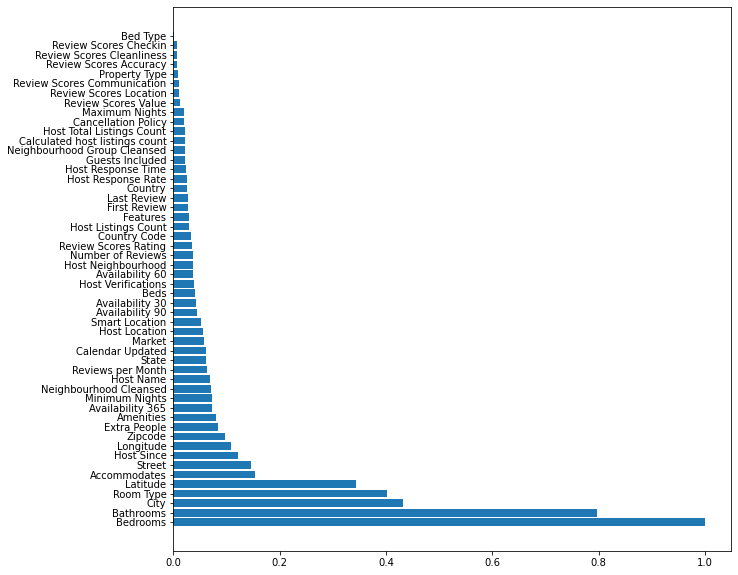

,Latitude,Room Type,City,Bathrooms,Bedrooms
9139,0.313961,-0.783324,2.746572,-0.427954,-0.378863
5723,-0.018570,1.131372,0.037319,-0.427954,-0.378863
2018,-0.010487,-0.783324,0.037319,-0.427954,-0.378863
3316,-0.002821,1.131372,0.037319,-0.427954,-0.378863
4328,-0.015340,-0.783324,0.037319,1.096426,0.731580
...,...,...,...,...,...
5191,-0.010348,-0.783324,0.037319,1.096426,0.731580
13418,-0.017669,-0.783324,0.037319,-0.427954,0.731580
5390,-0.015951,-0.783324,0.037319,-0.427954,-1.489307
860,-0.017445,1.131372,0.037319,0.334236,-0.378863


In [11]:
#------------------------------------------------------------------------------------------------------------------------
# Ahora veamos como podemos realizar una selección de características. Para ese fin aplicaremos un RandomForestRegressor
#------------------------------------------------------------------------------------------------------------------------

# Importamos las clases que utilizaremos
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Creamos el vector que continene la lista con los posibles parámetros de profundidad del árbol
possible_maxDepth = range(1,15)
param_grid = {"max_depth" : possible_maxDepth}

# Aplicamos el GridSearchCV para ver que resultados arroja con los diferentes max_depth
grid = GridSearchCV(RandomForestRegressor(random_state=0), param_grid=param_grid, cv=5, verbose=2)
grid.fit(x_train_scaled, y_train)

# Identificamos el max_depth óptimo, el mejor score y los mejores parámetros
print(f"Best Score: {grid.best_score_}")
print(f"Best Parameters: {grid.best_params_}")

# Ajustamos el modelo con el max_depth óptimo
rfr = RandomForestRegressor(max_depth=grid.best_params_["max_depth"])
rfr.fit(x_train_scaled, y_train)

# Identificamos y visualizamos la importancia de las variables
var_importances = rfr.feature_importances_
var_importances = var_importances / np.max(var_importances)

indices = np.argsort(var_importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(x_train.shape[1]), var_importances[indices])
plt.yticks(range(x_train.shape[1]), x_train.columns[indices])
plt.show()

#------------------------------------------------------------------------------------------------------------------------
# Después de aplicar el RandomForestRegressor, podemos notar que las variables que suelen quedar como las más
# importantes son: "Latitude", "Room Type", "City", "Bathrooms" y "Bedrooms". Por lo tanto, nos
# quedaremos con esas variables para modelar.
#------------------------------------------------------------------------------------------------------------------------

x_train_for_model = x_train_scaled[["Latitude","Room Type","City","Bathrooms","Bedrooms"]]
x_train_for_model

***Preprocesamiento para los Datos de prueba.***

In [12]:
#------------------------------------------------------------------------------------------------------------------------
# En primer lugar, eliminaremos aquellas variables que fueron eliminadas para los Datos de entrenamiento, ya sea porque a 
# simple vista se notaba que no serían útiles o porque su porcentaje de registros vacíos superaba el 30%
#------------------------------------------------------------------------------------------------------------------------

df_test = df_test.drop(["ID",
                        "Listing Url",
                        "Scrape ID",
                        "Last Scraped",
                        "Thumbnail Url",
                        "Medium Url",
                        "Picture Url",
                        "XL Picture Url",
                        "Host ID",
                        "Host URL",
                        "Host Thumbnail Url",
                        "Host Picture Url",
                        "Geolocation",
                        "Name",
                        "Summary",
                        "Space",
                        "Description",
                        "Experiences Offered",
                        "Calendar last Scraped",
                        "Has Availability",
                        "Host Acceptance Rate",
                        "Jurisdiction Names",
                        "License",
                        "Square Feet",
                        "Monthly Price",
                        "Weekly Price",
                        "Notes",
                        "Security Deposit",
                        "Interaction",
                        "Access",
                        "Cleaning Fee",
                        "Transit",
                        "Neighborhood Overview",
                        "Host About",
                        "Neighbourhood",
                        "House Rules"], axis=1)

#------------------------------------------------------------------------------------------------------------------------
# Ahora utilizamos los codificadores creados para los Datos de entrenamiento para codificar las variables categóricas
# de los Datos de prueba
#------------------------------------------------------------------------------------------------------------------------

df_test["Host Name"] = le_HostName.fit_transform(df_test["Host Name"])
df_test["Host Since"] = le_HostSince.fit_transform(df_test["Host Since"])
df_test["Host Location"] = le_HostLocation.fit_transform(df_test["Host Location"])
df_test["Host Response Time"] = le_HostResponseTime.fit_transform(df_test["Host Response Time"])
df_test["Host Neighbourhood"] = le_HostNeighbourhood.fit_transform(df_test["Host Neighbourhood"])
df_test["Host Verifications"] = le_HostVerifications.fit_transform(df_test["Host Verifications"])
df_test["Street"] = le_Street.fit_transform(df_test["Street"])
df_test["Neighbourhood Cleansed"] = le_NeighbourhoodCleansed.fit_transform(df_test["Neighbourhood Cleansed"])
df_test["Neighbourhood Group Cleansed"] = le_NeighbourhoodGroupCleansed.fit_transform(df_test["Neighbourhood Group Cleansed"])
df_test["City"] = le_City.fit_transform(df_test["City"])
df_test["State"] = le_State.fit_transform(df_test["State"])
df_test["Zipcode"] = le_Zipcode.fit_transform(df_test["Zipcode"])
df_test["Market"] = le_Market.fit_transform(df_test["Market"])
df_test["Smart Location"] = le_SmartLocation.fit_transform(df_test["Smart Location"])
df_test["Country Code"] = le_CountryCode.fit_transform(df_test["Country Code"])
df_test["Country"] = le_Country.fit_transform(df_test["Country"])
df_test["Property Type"] = le_PropertyType.fit_transform(df_test["Property Type"])
df_test["Room Type"] = le_RoomType.fit_transform(df_test["Room Type"])
df_test["Bed Type"] = le_BedType.fit_transform(df_test["Bed Type"])
df_test["Amenities"] = le_Amenities.fit_transform(df_test["Amenities"])
df_test["Calendar Updated"] = le_CalendarUpdated.fit_transform(df_test["Calendar Updated"])
df_test["First Review"] = le_FirstReview.fit_transform(df_test["First Review"])
df_test["Last Review"] = le_LastReview.fit_transform(df_test["Last Review"])
df_test["Cancellation Policy"] = le_CancellationPolicy.fit_transform(df_test["Cancellation Policy"])
df_test["Features"] = le_Features.fit_transform(df_test["Features"])

#------------------------------------------------------------------------------------------------------------------------
# Ahora utilizamos el imputador creado para rellenar los registros vacíos de los datos de entrenamiento para rellenar
# los datos vacíos en los Datos de prueba
#------------------------------------------------------------------------------------------------------------------------

lista_test = knni.transform(df_test)
df_test = pd.DataFrame(lista_test, columns=df_test.columns, index=df_test.index)

#------------------------------------------------------------------------------------------------------------------------
# Ahora dividiremos los Datos de prueba en Variables Predictoras y Variable a Predecir
#------------------------------------------------------------------------------------------------------------------------

x_test = df_test.drop("Price", axis=1)
y_test = df_test["Price"]

#------------------------------------------------------------------------------------------------------------------------
# Ahora utilizaremos el scaler creado para escalar los Datos de entrenamiento para escalar los Datos de prueba
#------------------------------------------------------------------------------------------------------------------------

x_test_scaled = pd.DataFrame(standard_scaler.transform(x_test), columns=x_test.columns, index=x_test.index)

#------------------------------------------------------------------------------------------------------------------------
# Ahora aplicaremos las conclusiones del RandomForestRegressor sobre la selección de características y nos quedaremos
# únicamente con las variables que aparentan ser verdaderamente relevantes para la predicción
#------------------------------------------------------------------------------------------------------------------------

x_test_for_model = x_test_scaled[["Latitude", "Room Type", "City", "Bathrooms", "Bedrooms"]]

# Modelado

Aplicaremos otro RandomForestRegressor. Esta vez no como selector de características, sino como predictor. Lo aplicaremos con un GridSearchCV para ver cuales son los mejores hiperparámetros.

In [13]:
# En primer lugar, importamos las clases a utilizar
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# En segundo lugar, creamos la lista de posibles parámetros (Con base en estos es que encontraremos el óptimo)
possible_max_depth = range(1,5)

# En tercer lugar construimos y ajustamos el GridSearchCV
param_grid = {"max_depth" : possible_max_depth}
grid = GridSearchCV(RandomForestRegressor(random_state=0), param_grid=param_grid, cv=10, verbose=2)
grid.fit(x_train_for_model, y_train)

# En cuarto lugar inicializamos los valores óptimos
max_depth_optimo = grid.best_params_["max_depth"]

# En quinto lugar, inicializamos el mismo modelo nuevamente, pero esta vez directamente con los valores óptimos
rfr = RandomForestRegressor(random_state=0, max_depth=max_depth_optimo)
rfr.fit(x_train_for_model, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END .......................................

RandomForestRegressor(max_depth=4, random_state=0)

Ya teniendo el modelo ajustado con los mejores hiperparámetros posibles, hagamos las predicciones y estudiemos los resultados.

In [14]:
# En primer lugar, importemos la clase mean_squared_error de Scikit-Learn para poder medir los errores
from sklearn.metrics import mean_squared_error

# En segundo lugar hacemos las predicciones
y_train_pred = rfr.predict(x_train_for_model)
y_test_pred = rfr.predict(x_test_for_model)

# En tercer lugar, comparamos la predicción con los resultados reales y vemos los errores
print(f"RMSE for train: {round(mean_squared_error(y_train_pred, y_train, squared=False),2)}")
print(f"RMSE for test: {round(mean_squared_error(y_test_pred, y_test, squared=False),2)}")

RMSE for train: 47.92
RMSE for test: 54.64


# Conclusiones

**Con estos resultados, podemos concluir que se pueden conseguir resultados bastante decentes con solo 5 variables...**

**A partir de aquí, podríamos mejorar estos resultados buscando la manera de obtener más datos, pues la cantidad utilizada, si bien podría considerarse suficiente para obtener resultados más o menos decentes, es mucho menos de lo recomendado.**

**Otro camino sería modificar más hiperparámetros y ajustar modelos más computacionalmente complejos. Podríamos mejorar los resultados optando por esta estrategia debido a que el Dataset que tenemos ahora (Después de la Selección de Características), no es complicado de procesar para ningún modelo.**